In [4]:
import os
import numpy as np
!pip install tensorflow
import tensorflow as tf

In [6]:
from tensorflow.keras import layers

In [8]:
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [10]:
from tensorflow.keras.models import Sequential, load_model

In [146]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [148]:
import os
import zipfile

# Set the path to your dataset folder
dataset_path = 'DataSet/'

# Step 1: Unzip all .zip files in the folder
for file in os.listdir(dataset_path):
    if file.endswith('.zip'):
        zip_path = os.path.join(dataset_path, file)
        extract_folder = os.path.join(dataset_path, file.replace('.zip', ''))
        
        # Extract only if not already extracted
        if not os.path.exists(extract_folder):
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_folder)
                print(f'Unzipped {file} into folder {extract_folder}')

# Step 2: Count images in each dataset folder (excluding system folders)
for folder in os.listdir(dataset_path):
    if folder.startswith('.'):  # Skip hidden folders like .ipynb_checkpoints
        continue

    outer_folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(outer_folder_path):
        # Check for subfolder (e.g., DataSet/tulip/tulip)
        subfolders = [os.path.join(outer_folder_path, d) for d in os.listdir(outer_folder_path)
                      if os.path.isdir(os.path.join(outer_folder_path, d)) and not d.startswith('.')]
        
        # If nested folder exists, use it; otherwise, use outer folder
        target_folder = subfolders[0] if subfolders else outer_folder_path

        # Recursively count image files
        image_count = 0
        for root, dirs, files in os.walk(target_folder):
            image_count += len([f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            
        print(f'{folder} Folder has {image_count} Images')


daisy Folder has 764 Images
rose Folder has 784 Images
tulip Folder has 985 Images
dandelion Folder has 1052 Images
sunflower Folder has 733 Images


In [150]:
base_dir = 'DataSet/'
img_size = 180
batch = 32

In [152]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed = 123,
                                                      validation_split=0.2,
                                                      subset ='training',
                                                      batch_size = batch,
                                                      image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed = 123,
                                                      validation_split=0.2,
                                                      subset ='validation',
                                                      batch_size = batch,
                                                      image_size=(img_size,img_size))

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [153]:
flower_name = train_ds.class_names
flower_name

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [156]:
import matplotlib.pyplot  as plt

2025-04-19 03:48:25.474948: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


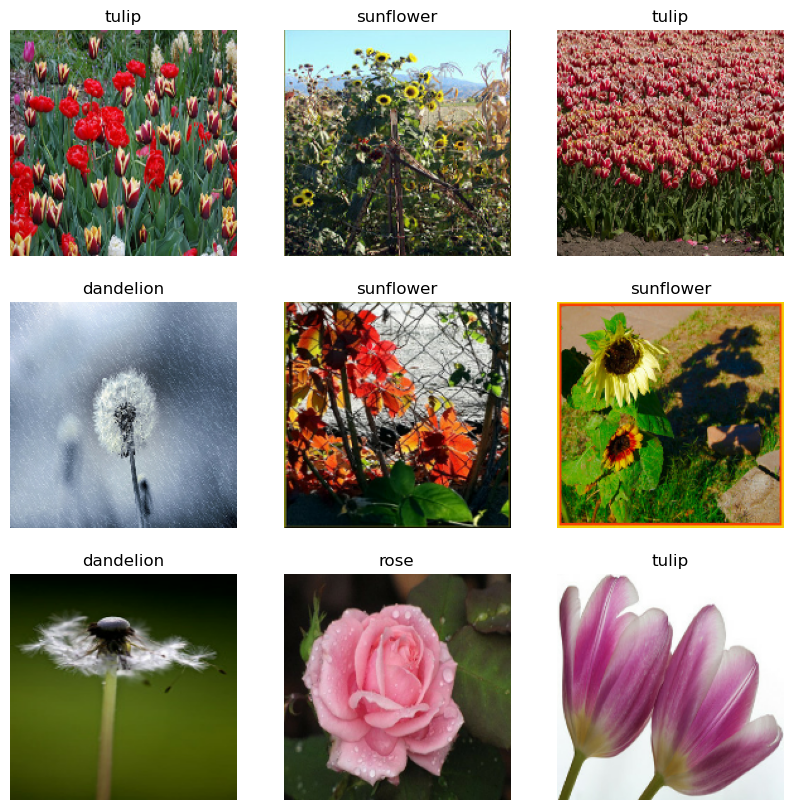

In [158]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_name[labels[i]])
        plt.axis('off')

In [159]:
AUTOTUNE = tf.data.AUTOTUNE

In [162]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [164]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [166]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

inputs = keras.Input(shape=(180, 180, 3)) 


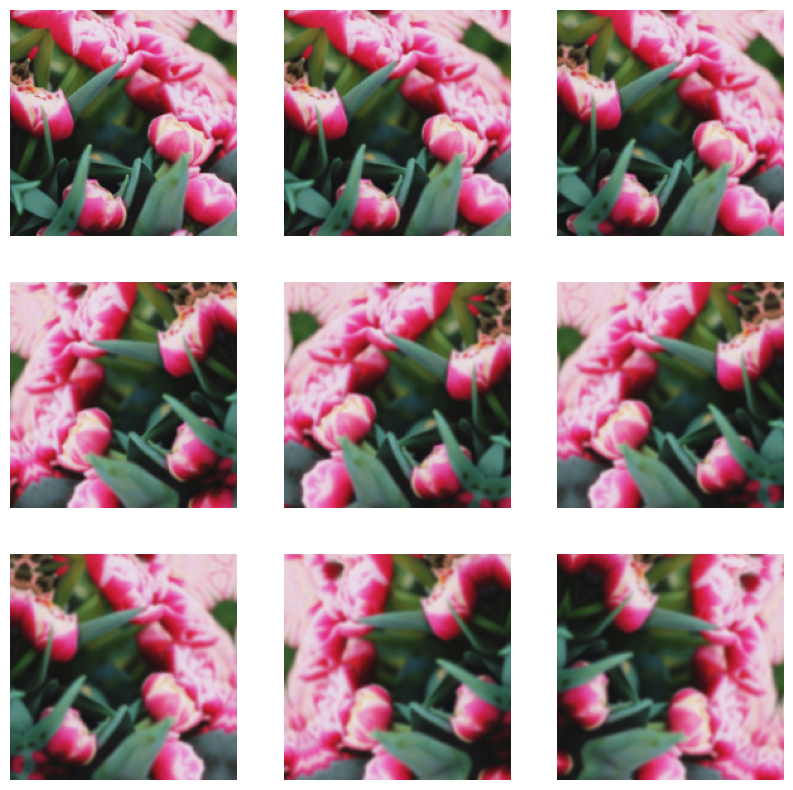

In [168]:
i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images) 
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [172]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16,3,padding ='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3,padding ='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding ='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(5)
])

In [176]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [178]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 5)                │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [180]:
history = model.fit(train_ds, epochs = 15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - accuracy: 0.3412 - loss: 1.6752 - val_accuracy: 0.5492 - val_loss: 1.1026
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.5648 - loss: 1.0914 - val_accuracy: 0.6014 - val_loss: 0.9935
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.6069 - loss: 1.0126 - val_accuracy: 0.6072 - val_loss: 0.9525
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - accuracy: 0.6269 - loss: 0.9664 - val_accuracy: 0.6280 - val_loss: 0.9459
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - accuracy: 0.6466 - loss: 0.9055 - val_accuracy: 0.6802 - val_loss: 0.8113
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - accuracy: 0.6923 - loss: 0.8044 - val_accuracy: 0.6709 - val_loss: 0.8243
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.7094 - loss: 0.7877 - val_accuracy: 0.6732 - val_loss: 0.8017
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.7151 - loss: 0

In [223]:
def classify_images(image_path):
    input_images = tf.keras.utils.load_img(image_path, target_size=(180, 180))  
    input_images_array=tf.keras.utils.img_to_array(input_images)
    input_images_exp_dim = tf.expand_dims(input_images_array,0)
    
    predcitions = model.predict(input_images_exp_dim)
    result=tf.nn.softmax(predcitions[0])
    outcome = 'The Image belongs to' +' '+ flower_name[np.argmax(result)] +' '+ 'with a score of ' +str (np.max(result)*100)
    return outcome

In [225]:
classify_images('Sample/rose.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'The Image belongs to rose with a score of 96.2769865989685'

In [227]:
model.save('Flower_recoginition_Moodel.h5')